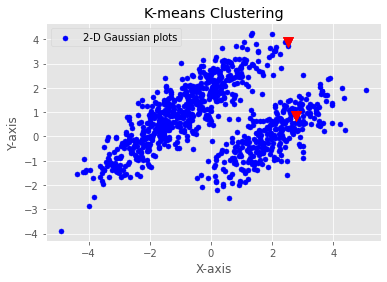

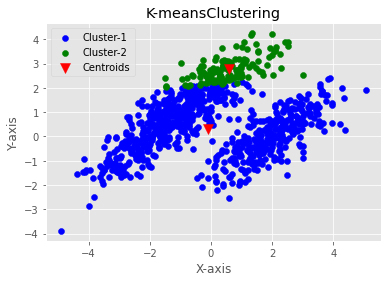

Accuracy for K = 2 is 32.77777777777778


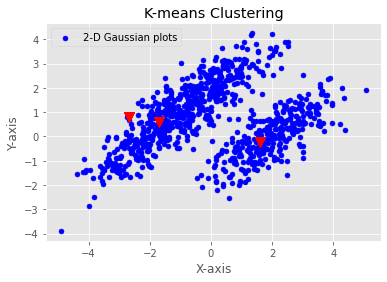

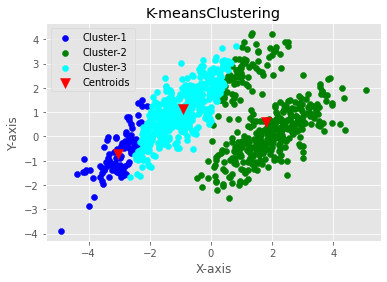

Accuracy for K = 3 is 67.88888888888889


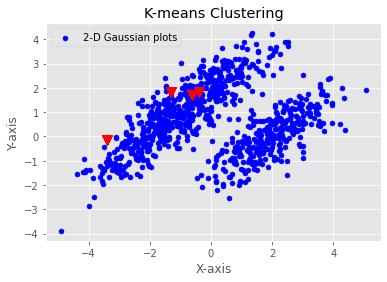

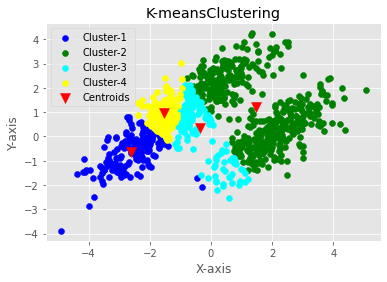

Accuracy for K = 4 is 53.22222222222223


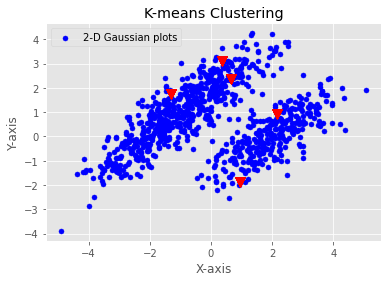

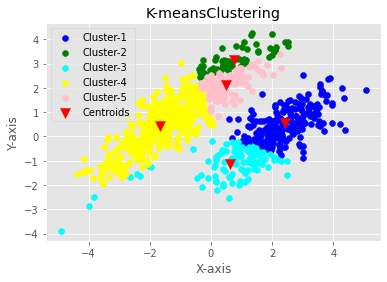

Accuracy for K = 5 is 0.0


In [5]:
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
style.use('ggplot')
import numpy as np
import random as rd
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
# given parameters for 2d Gaussian data generattion
mean = [-2,0]
sigma = [[1,0.75],[0.75,1]]
mean2 = [2,0]
mean3 = [0,2]

X,Y = data_1 = np.random.multivariate_normal(mean,sigma, 300).T
X2,Y2 = data_2 = np.random.multivariate_normal(mean2,sigma, 300).T
X3,Y3 = data_3 =np.random.multivariate_normal(mean3,sigma, 300).T

data_1 = pd.DataFrame(data_1,index = ['x','y']).T
data_1['Cluster1'] = 1
data_2 = pd.DataFrame(data_2,index = ['x','y']).T
data_2['Cluster1'] = 2

data_3 = pd.DataFrame(data_3,index = ['x','y']).T
data_3['Cluster1'] = 3


X_dataframe = data_1.append(data_2)

X_dataframe = X_dataframe.append(data_3)
#dataframe generated for the kmeans clustering

def mykmeans(X_dataframe, K=3):
#     Calculating random centroids 
    Centroids = (X_dataframe.sample(n=K))
    for i in Centroids:
        plt.scatter(Centroids["x"], Centroids["y"], s=100, color='red', marker='v')
    plt.legend(loc="upper left")
    plt.show()
    diff = 1
    i = 0
# Calculating Euclidean distance
    while (diff != 0):
        XD = X_dataframe
        i = 1
        for index1, row_c in Centroids.iterrows():
            ED = []
            for index2, row_d in X_dataframe.iterrows():
                distance_x = (row_c["x"] - row_d["x"]) ** 2
                distance_y = (row_c["y"] - row_d["y"]) ** 2
                d = np.sqrt(distance_x + distance_y)
                ED.append(d)
            X_dataframe[i] = ED
            i = i + 1
# predicting the clusters dependiong on the distance between the data and centroids
        C = []
        for index, row in X_dataframe.iterrows():
            closest = row[1]
            pos = 1
            i = 1
            for i in range(K):
                if row[i + 1] < closest:
                    closest = row[i + 1]
                    pos = i + 1
            C.append(pos)
        X_dataframe["Cluster"] = C
# updating the new centroids
        Centroids_new = X_dataframe.groupby(["Cluster"]).mean()[["y", "x"]]
        if i == 0:
            diff = 1
            i = i + 1
        else:
            diff = (Centroids_new['y'] - Centroids['y']).sum() + (Centroids_new['x'] - Centroids['x']).sum()

        Centroids = X_dataframe.groupby(["Cluster"]).mean()[["y", "x"]]

    return X_dataframe, Centroids


K = [2, 3, 4, 5]
for i in K:
#     plotting the entire data
    plt.title('K-means Clustering')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')

    plt.scatter(X, Y, s=25, c='Blue', label='2-D Gaussian plots')
    plt.scatter(X2, Y2, s=25, c='Blue')
    plt.scatter(X3, Y3, s=25, c='Blue')

    X_dataframe1, Centroids = mykmeans(X_dataframe, i)
    #     test_dataframe1,test_Centroids = mykmeans(test,i)

    color = ['blue', 'green', 'cyan', 'yellow', 'pink']
    labels = ['Cluster-1', 'Cluster-2', 'Cluster-3', 'Cluster-4', 'Cluster-5']
    for k in range(i):
        data = X_dataframe1[X_dataframe1["Cluster"] == k + 1]
        plt.scatter(data["x"], data["y"], c=color[k], label=labels[k])
    plt.scatter(Centroids["x"], Centroids["y"], s=100, c='red', label='Centroids', marker='v')
    plt.title('K-meansClustering')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend(loc="upper left")
    plt.show(-10, 10)

    print('Accuracy for K =', i, 'is', accuracy_score(X_dataframe['Cluster1'], X_dataframe1['Cluster']) * 100)